## Data Cleaning

##### Reading the csv file

In [13]:
import pandas as pd

# Reading a csv file
SanBoraj=pd.read_csv('San_boraj.csv')
SanBoraj.head()

,id,name,month,average,parameter,parameterId,displayName,unit,first_datetime,last_datetime
0,2402,SAN BORJA,2018-02-01,54.548000,pm10,1,PM10,µg/m³,2018-02-19T17:00:00Z,2018-02-23T06:00:00Z
1,2402,SAN BORJA,2018-03-01,43.410441,pm10,1,PM10,µg/m³,2018-03-01T07:00:00Z,2018-03-14T07:00:00Z
2,2402,SAN BORJA,2018-04-01,64.367201,pm10,1,PM10,µg/m³,2018-04-11T17:00:00Z,2018-05-01T00:00:00Z
3,2402,SAN BORJA,2018-05-01,69.778412,pm10,1,PM10,µg/m³,2018-05-01T01:00:00Z,2018-06-01T00:00:00Z
4,2402,SAN BORJA,2018-06-01,32.979294,pm10,1,PM10,µg/m³,2018-06-01T01:00:00Z,2018-07-01T00:00:00Z


##### Rounding the average values of the parameter 

In [2]:
# Round the average column
SanBoraj['average'] = SanBoraj['average'].round()

# Print the DataFrame to verify
SanBoraj.head()

,id,name,month,average,parameter,parameterId,displayName,unit,first_datetime,last_datetime
0,2402,SAN BORJA,2018-02-01,55.0,pm10,1,PM10,µg/m³,2018-02-19T17:00:00Z,2018-02-23T06:00:00Z
1,2402,SAN BORJA,2018-03-01,43.0,pm10,1,PM10,µg/m³,2018-03-01T07:00:00Z,2018-03-14T07:00:00Z
2,2402,SAN BORJA,2018-04-01,64.0,pm10,1,PM10,µg/m³,2018-04-11T17:00:00Z,2018-05-01T00:00:00Z
3,2402,SAN BORJA,2018-05-01,70.0,pm10,1,PM10,µg/m³,2018-05-01T01:00:00Z,2018-06-01T00:00:00Z
4,2402,SAN BORJA,2018-06-01,33.0,pm10,1,PM10,µg/m³,2018-06-01T01:00:00Z,2018-07-01T00:00:00Z


##### Here we are dropping the columns that we don't need for the analysis

In [3]:
# Dropping unnecessary columns
SanBoraj=SanBoraj.drop(['first_datetime', 'last_datetime'], axis=1)
# Checking the first few rows
SanBoraj.head()

,id,name,month,average,parameter,parameterId,displayName,unit
0,2402,SAN BORJA,2018-02-01,55.0,pm10,1,PM10,µg/m³
1,2402,SAN BORJA,2018-03-01,43.0,pm10,1,PM10,µg/m³
2,2402,SAN BORJA,2018-04-01,64.0,pm10,1,PM10,µg/m³
3,2402,SAN BORJA,2018-05-01,70.0,pm10,1,PM10,µg/m³
4,2402,SAN BORJA,2018-06-01,33.0,pm10,1,PM10,µg/m³


##### Checking for duplicate values

In [4]:
# Check for duplicated rows
duplicates = SanBoraj[SanBoraj.duplicated(keep=False)]

# Display the duplicated rows
print(duplicates)

Empty DataFrame
Columns: [id, name, month, average, parameter, parameterId, displayName, unit]
Index: []


##### Modifying the months column

In [5]:
# Creating a dataframe
SanBoraj = pd.DataFrame(SanBoraj)

# Convert the 'month' column to datetime
SanBoraj['month']=pd.to_datetime(SanBoraj['month'])

# Apply strftime to the 'month' column to format it as "Month Year"
SanBoraj['formatted_month'] = SanBoraj['month'].dt.strftime('%B %Y')

# Checking on few rows
SanBoraj.head()

,id,name,month,average,parameter,parameterId,displayName,unit,formatted_month
0,2402,SAN BORJA,2018-02-01,55.0,pm10,1,PM10,µg/m³,February 2018
1,2402,SAN BORJA,2018-03-01,43.0,pm10,1,PM10,µg/m³,March 2018
2,2402,SAN BORJA,2018-04-01,64.0,pm10,1,PM10,µg/m³,April 2018
3,2402,SAN BORJA,2018-05-01,70.0,pm10,1,PM10,µg/m³,May 2018
4,2402,SAN BORJA,2018-06-01,33.0,pm10,1,PM10,µg/m³,June 2018


In [6]:
# Removing the previous 'month' column
SanBoraj=SanBoraj.drop('month',axis=1)
SanBoraj.head()
  

,id,name,average,parameter,parameterId,displayName,unit,formatted_month
0,2402,SAN BORJA,55.0,pm10,1,PM10,µg/m³,February 2018
1,2402,SAN BORJA,43.0,pm10,1,PM10,µg/m³,March 2018
2,2402,SAN BORJA,64.0,pm10,1,PM10,µg/m³,April 2018
3,2402,SAN BORJA,70.0,pm10,1,PM10,µg/m³,May 2018
4,2402,SAN BORJA,33.0,pm10,1,PM10,µg/m³,June 2018


#### Modifying the columns

In [7]:
# Splitting the formatted_month column to month and year
SanBoraj[['months','year']] = SanBoraj['formatted_month'].str.split(' ',expand=True)
SanBoraj 

# Removing the formatted_month column
SanBoraj = SanBoraj.drop('formatted_month',axis=1)
SanBoraj.head()

# Export the DataFrame to a CSV file
csv_file_path = 'SanBoraj_modified.csv'
SanBoraj.to_csv(csv_file_path, index=False)

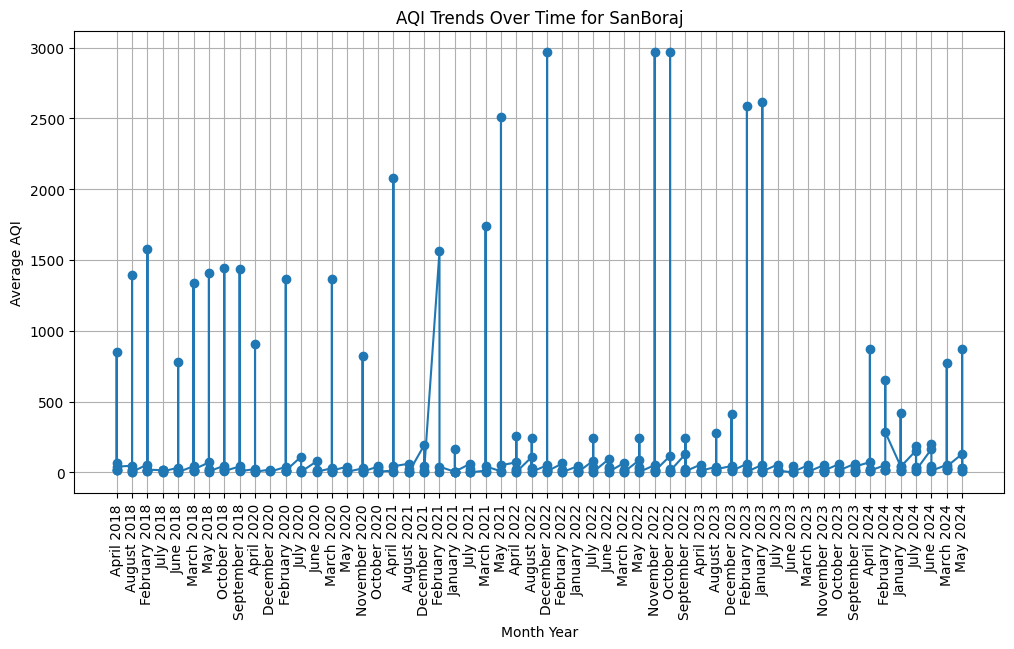

In [8]:
import matplotlib.pyplot as plt

# Sort the DataFrame by year and month
SanBoraj = SanBoraj.sort_values(by=['year', 'months'])

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(SanBoraj['months'] + ' ' + SanBoraj['year'].astype(str), SanBoraj['average'], marker='o', linestyle='-')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Month Year')
plt.ylabel('Average AQI')
plt.title('AQI Trends Over Time for SanBoraj')
plt.grid(True)
plt.show()


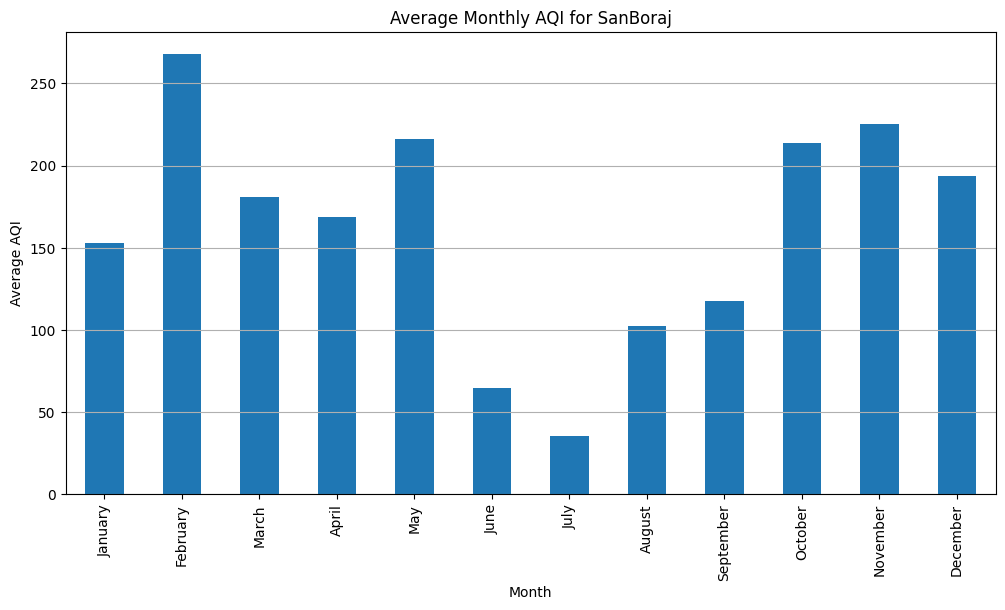

In [9]:
# Group by month and calculate the mean AQI for each month
monthly_avg_aqi = SanBoraj.groupby('months')['average'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Create a bar chart
plt.figure(figsize=(12, 6))
monthly_avg_aqi.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average Monthly AQI for SanBoraj')
plt.grid(axis='y')
plt.show()


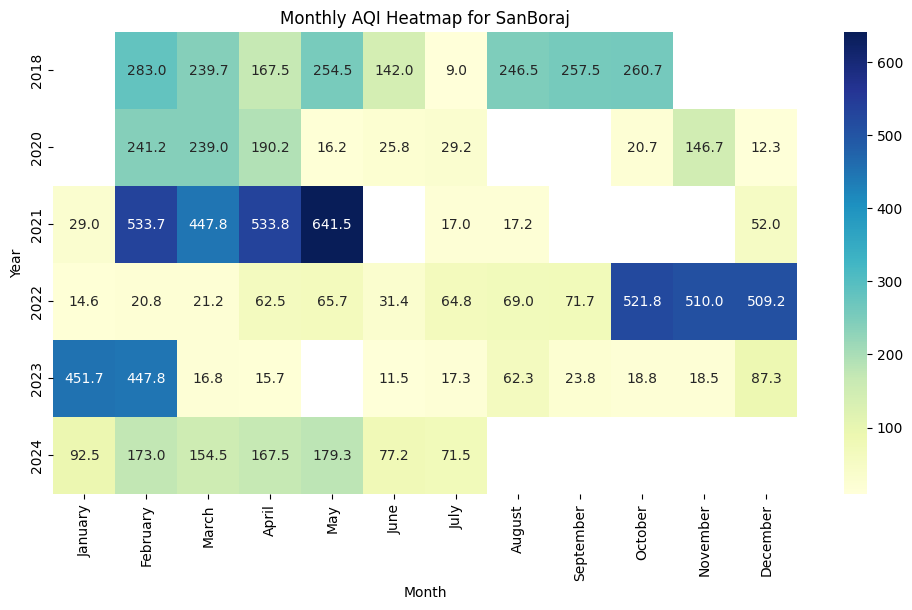

In [10]:
import seaborn as sns

# Pivot the DataFrame to create a heatmap
heatmap_data = SanBoraj.pivot_table(values='average', index='year', columns='months', aggfunc='mean').reindex(columns=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Monthly AQI Heatmap for SanBoraj')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


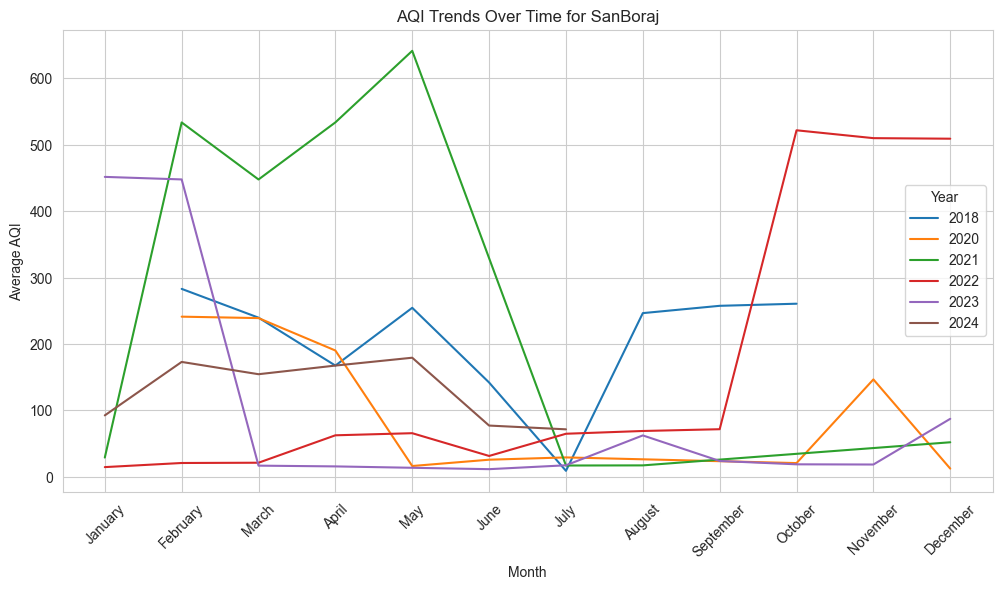

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'SanBoraj' is your DataFrame

# Create a pivot table
pivot_df = SanBoraj.pivot_table(values='average', index='months', columns='year', aggfunc='mean').reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
for year in pivot_df.columns:
    sns.lineplot(data=pivot_df, x=pivot_df.index, y=pivot_df[year], label=year)

plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('AQI Trends Over Time for SanBoraj')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()
